In [ ]:
# Create the Google Drive connection
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import the os package and list the files in MyDrive
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case'))

['test.csv', 'items.csv', 'holidays_events.csv', 'oil.csv', 'stores.csv', 'sample_submission.csv', 'transactions.csv', 'favorita-grocery-sales-forecasting.zip', 'trainprocess.csv', 'OLD train.csv', 'Tom - W1 Project Ori.ipynb', 'Copy of TS_retail_kaggle_EDA.ipynb', 'Masterschool Time Series Forecasting Assignment.pdf', '2 OLD train.csv', 'train.csv', 'Prophet with aggregation data_prep.ipynb', 'LSTM data_prep.ipynb']


In [ ]:
# Import the Pandas library
import pandas as pd

In [ ]:
df_holidays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/holidays_events.csv')
display(df_holidays.head())

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
df_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/items.csv')
display(df_items.head())

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [ ]:
df_oil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/oil.csv')
display(df_oil.head())

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
df_stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/stores.csv')
display(df_stores.head())

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
df_transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/transactions.csv')
display(df_transactions.head())

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/train.csv', nrows=2e6, low_memory=False)
display(df_train.head())

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,34,115850,2013-01-02,25767.0,6.0,False,2013,1,2,2,NaN
1,30,321798,2013-01-02,23302.0,1.0,False,2013,1,2,2,NaN
2,35,819195,2013-01-02,26945.0,1.0,False,2013,1,2,2,NaN
3,24,959500,2013-01-02,19641.0,5.0,False,2013,1,2,2,NaN
4,35,683721,2013-01-02,26892.0,3.0,False,2013,1,2,2,NaN


## **EDA each datasets**

In [ ]:
# df_holidays

print(f'shape : {df_holidays.shape}')
print('='*30)
print(df_holidays.info())
print('='*30)
print(f'missing values : \n{df_holidays.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_holidays.duplicated().sum()}')

shape : (350, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None
missing values : 
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
duplicates : 0


In [ ]:
# df_items

print(f'shape : {df_items.shape}')
print('='*30)
print(df_items.info())
print('='*30)
print(f'missing values : \n{df_items.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_items.duplicated().sum()}')

shape : (4100, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB
None
missing values : 
item_nbr      0
family        0
class         0
perishable    0
dtype: int64
duplicates : 0


In [ ]:
# df_oil

print(f'shape : {df_oil.shape}')
print('='*30)
print(df_oil.info())
print('='*30)
print(f'missing values : \n{df_oil.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_oil.duplicated().sum()}')

shape : (1218, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None
missing values : 
date           0
dcoilwtico    43
dtype: int64
duplicates : 0


In [ ]:
# df_stores

print(f'shape : {df_stores.shape}')
print('='*30)
print(df_stores.info())
print('='*30)
print(f'missing values : \n{df_stores.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_stores.duplicated().sum()}')

shape : (54, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
missing values : 
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
duplicates : 0


In [ ]:
# df_transactions

print(f'shape : {df_transactions.shape}')
print('='*30)
print(df_transactions.info())
print('='*30)
print(f'missing values : \n{df_transactions.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_transactions.duplicated().sum()}')

shape : (83488, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None
missing values : 
date            0
store_nbr       0
transactions    0
dtype: int64
duplicates : 0


In [ ]:
# df_train

print(f'shape : {df_train.shape}')
print('='*30)
print(df_train.info())
print('='*30)
print(f'missing values : \n{df_train.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_train.duplicated().sum()}')

shape : (300000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   store_nbr          300000 non-null  int64  
 1   item_nbr           300000 non-null  int64  
 2   date               300000 non-null  object 
 3   id                 300000 non-null  float64
 4   unit_sales         300000 non-null  float64
 5   onpromotion        300000 non-null  bool   
 6   year               300000 non-null  int64  
 7   month              300000 non-null  int64  
 8   day                300000 non-null  int64  
 9   day_of_week        300000 non-null  int64  
 10  unit_sales_7d_avg  299400 non-null  float64
dtypes: bool(1), float64(3), int64(6), object(1)
memory usage: 23.2+ MB
None
missing values : 
store_nbr              0
item_nbr               0
date                   0
id                     0
unit_sales             0
onpromotion

## **Merging**

In [ ]:
# Select list of stores located in the 'Guayas' region
# Find only stores in Guayas, then take UNIQUE the store_nbr.
# So there wont be duplicate store_nbr
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()

# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/train.csv', chunksize=chunk_size, dtype={'onpromotion': object}):
    # Convert string representations of boolean values to actual boolean values
    chunk['onpromotion'] = chunk['onpromotion'].map({'True': True, 'False': False, None: None})

    # Convert 'onpromotion' column to nullable boolean
    chunk['onpromotion'] = chunk['onpromotion'].astype('boolean')

    # Filter the chunk for the desired store IDs and include item_nbr column
    chunk_filtered = chunk[chunk['store_nbr'].isin(store_ids)][['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion','year','month','day','day_of_week', 'unit_sales_7d_avg']]

    # Append the filtered chunk (kosongan) to the list
    filtered_chunks.append(chunk_filtered)

    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks

## **Filtering and Ploting Top 3 families**

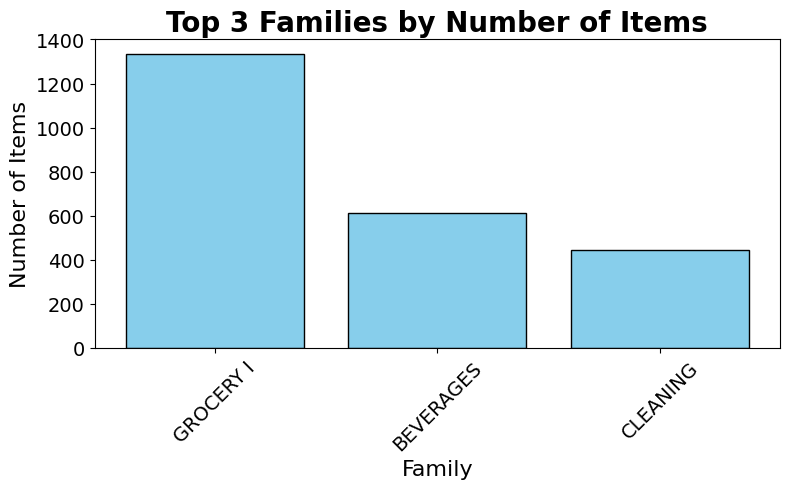

In [ ]:
# Importing package
import matplotlib.pyplot as plt

# Plotting the number of items per family (for top 3 families only)
# Compute the number of items per family and select the top 3 families
items_per_family = df_items['family'].value_counts().reset_index()
items_per_family.columns = ['Family', 'Item Count']
top_3_families = items_per_family.head(3)  # Keep only the top 3 families

# Plot the top 10 families
plt.figure(figsize=(8, 5))
plt.bar(top_3_families['Family'], top_3_families['Item Count'], color='skyblue', edgecolor='black')
plt.title("Top 3 Families by Number of Items", fontsize=20, fontweight='bold')
plt.xlabel("Family", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
# Display the plot
plt.show()

### **Filter Top 3 families to analyze**

In [ ]:
# Filtering the data

item_ids = df_items[df_items['family'].isin(top_3_families['Family'].unique())]['item_nbr'].unique()

df_train = df_train[df_train['item_nbr'].isin(item_ids)]

## **Checking negative sales**

In [ ]:
# Checking for negative sales (returns)
negative_sales = df_train[df_train['unit_sales'] < 0]

negative_sales.head()  # Viewing negative sales for analysis

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg


In [ ]:
if (df_train['unit_sales'] < 0).any():
  print('there is zero sales')
else:
  print('no zero sales')

no zero sales


## **Feature Engineering df_train**

In [ ]:
# convert the type
df_train['date'] = pd.to_datetime(df_train['date'])

# sort the date
df_train = df_train.sort_values(['store_nbr', 'item_nbr', 'date'])

# Impute basic features
df_train['onpromotion'] = df_train['onpromotion'].fillna(False)
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek

# Rolling averages (overwrite NaN)
df_train['unit_sales_7d_avg'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# Lag variables (penting utk XGBoost, RF, linear reg, NN (MLP/dense)
df_train['unit_sales_lag1'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1)
df_train['unit_sales_lag7'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(7)

# Holidays
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

df_holidays_filtered = df_holidays[
    (df_holidays['date'] >= '2014-01-01') &
    (df_holidays['date'] <= '2014-03-31') &
    (
        (df_holidays['locale'] == 'National') |
        ((df_holidays['locale'] == 'Regional') & (df_holidays['locale_name'] == 'Guayas')) |
        ((df_holidays['locale'] == 'Local') & (df_holidays['locale_name'].isin(['Guayaquil', 'Salinas', 'Playas'])))
    )
]

In [ ]:
# merging holidays with df_train

df_train = df_train.merge(
    df_holidays_filtered[['date', 'type', 'transferred']],
    on='date',
    how='left'
)

df_train['is_holiday'] = df_train['type'].notna()
df_train['is_transferred_holiday'] = df_train['transferred'].fillna(False)
df_train = df_train.drop(['type', 'transferred'], axis=1)

# Weekend
df_train['is_weekend'] = df_train['day_of_week'].isin([5, 6])

# Promotion interactions
df_train['promo_weekend'] = df_train['onpromotion'] & df_train['is_weekend']
df_train['promo_holiday'] = df_train['onpromotion'] & df_train['is_holiday']

print(df_train.head())


          id       date  store_nbr  item_nbr  unit_sales  onpromotion  year  \
0  5305742.0 2013-05-08         24     96995         1.0        False  2013   
1  6945807.0 2013-06-14         24     96995         3.0        False  2013   
2  8034773.0 2013-07-08         24     96995         2.0        False  2013   
3  8164384.0 2013-07-11         24     96995         1.0        False  2013   
4  8430231.0 2013-07-17         24     96995         1.0        False  2013   

   month  day  day_of_week  unit_sales_7d_avg  unit_sales_lag1  \
0      5    8            2               1.00              NaN   
1      6   14            4               2.00              1.0   
2      7    8            0               2.00              3.0   
3      7   11            3               1.75              2.0   
4      7   17            2               1.60              1.0   

   unit_sales_lag7  is_holiday  is_transferred_holiday  is_weekend  \
0              NaN       False                   False    

/tmp/ipython-input-362999109.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['is_transferred_holiday'] = df_train['transferred'].fillna(False)


In [ ]:
df_train['date'].max()

Timestamp('2017-08-15 00:00:00')

### **Filter period Jan - Mar 2014**

In [ ]:
# Filter df_train
df_train_filtered = df_train[
    (df_train['date'] >= '2014-01-01') &
    (df_train['date'] <= '2014-03-31')
].copy()

print(f'After filter: {df_train_filtered.shape}')
print(f'Period: {df_train_filtered["date"].min()} to {df_train_filtered["date"].max()}')


After filter: (12772, 18)
Period: 2014-01-01 00:00:00 to 2014-03-31 00:00:00


In [ ]:
# Set date range
min_date = pd.to_datetime('2014-01-01')
max_date = pd.to_datetime('2014-03-31')

# Get full date range
full_date_range = pd.DataFrame({'date': pd.date_range(min_date, max_date, freq='D')})


In [ ]:
# Create all combinations
store_item_combinations = df_train_filtered[['store_nbr', 'item_nbr']].drop_duplicates()
all_combinations = store_item_combinations.merge(full_date_range, how='cross')

# Merge with filtered data
df_filled = all_combinations.merge(df_train_filtered, on=['date','store_nbr', 'item_nbr'], how='left')

In [ ]:
# Fill missing values
df_filled['unit_sales'] = df_filled['unit_sales'].fillna(0)

# Replace df_train
df_train = df_filled
del df_filled

print(f'Final shape: {df_train.shape}')


Final shape: (646470, 18)


In [ ]:
# checking the period
print(f' min : {df_train['date'].min()}')
print(f' max: {df_train['date'].max()}')

 min : 2014-01-01 00:00:00
 max: 2014-03-31 00:00:00


### **Flag Outlier using Zscore**

In [ ]:
def calculate_store_item_zscore(group):
    mean_sales = group['unit_sales'].mean()
    std_sales = group['unit_sales'].std()
    group['z_score'] = (group['unit_sales'] - mean_sales) / (std_sales if std_sales != 0 else 1)
    return group

# Calculate z-score and overwrite df_train
df_train = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)
df_train.reset_index(drop=True, inplace=True)

# Flag outliers
df_train['is_outlier'] = df_train['z_score'].abs() > 3

print(f'Period: {df_train["date"].min()} to {df_train["date"].max()}')
print(f'Total outliers: {df_train["is_outlier"].sum()}')
print(f'Shape: {df_train.shape}')

Period: 2014-01-01 00:00:00 to 2014-03-31 00:00:00
Total outliers: 10692
Shape: (646470, 20)


/tmp/ipython-input-3466649503.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)


In [ ]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,unit_sales_lag1,unit_sales_lag7,is_holiday,is_transferred_holiday,is_weekend,promo_weekend,promo_holiday,z_score,is_outlier
0,24,105577,2014-01-01,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,-0.173767,False
1,24,105577,2014-01-02,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,-0.173767,False
2,24,105577,2014-01-03,16418874.0,5.0,False,2014.0,1.0,3.0,4.0,2.428571,2.0,1.0,False,False,False,False,False,6.342507,True
3,24,105577,2014-01-04,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,-0.173767,False
4,24,105577,2014-01-05,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,-0.173767,False


## **Handling missing values (again)**

after merged holidays, fulldate from Jan - Mar 2014, top 3 family

In [ ]:
# Basic datetime features
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek


In [ ]:
# Onpromotion
df_train['onpromotion'] = df_train['onpromotion'].fillna(False)


In [ ]:
# Sort data
df_train = df_train.sort_values(['store_nbr', 'item_nbr', 'date'])

In [ ]:
# Rolling averages
df_train['unit_sales_7d_avg'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

In [ ]:
# Lag variables (re-calculate!)
df_train['unit_sales_lag1'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).fillna(0)
df_train['unit_sales_lag7'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(7).fillna(0)


In [ ]:
# Holiday features

df_train['is_holiday'] = df_train['is_holiday'].fillna(False)
df_train['is_transferred_holiday'] = df_train['is_transferred_holiday'].fillna(False)


/tmp/ipython-input-1439814415.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['is_holiday'] = df_train['is_holiday'].fillna(False)
/tmp/ipython-input-1439814415.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['is_transferred_holiday'] = df_train['is_transferred_holiday'].fillna(False)


In [ ]:
# Weekend features
df_train['is_weekend'] = df_train['day_of_week'].isin([5, 6])

In [ ]:
#  Interaction features

df_train['promo_weekend'] = df_train['onpromotion'] & df_train['is_weekend']
df_train['promo_holiday'] = df_train['onpromotion'] & df_train['is_holiday']

In [ ]:
print(df_train.isna().sum())
print(f"\nTotal NaN: {df_train.isna().sum().sum()}")

if df_train.isna().sum().sum() == 0:
    print("\nNo NaN! Ready for modeling!")
else:
    print("\nThere areNaN!")

print("\n" + "="*50)
print("DATA PREVIEW:")
print("="*50)
print(df_train.head(10))

store_nbr                      0
item_nbr                       0
date                           0
id                        633698
unit_sales                     0
onpromotion                    0
year                           0
month                          0
day                            0
day_of_week                    0
unit_sales_7d_avg              0
unit_sales_lag1                0
unit_sales_lag7                0
is_holiday                     0
is_transferred_holiday         0
is_weekend                     0
promo_weekend                  0
promo_holiday                  0
z_score                        0
is_outlier                     0
dtype: int64

Total NaN: 633698

There areNaN!

DATA PREVIEW:
   store_nbr  item_nbr       date          id  unit_sales  onpromotion  year  \
0         24    105577 2014-01-01         NaN         0.0        False  2014   
1         24    105577 2014-01-02         NaN         0.0        False  2014   
2         24    105577 2014-01-03  164

## **Merge df_oil**

The steps are the same just like df_holidays

In [ ]:
print(df_oil.head(10))
print(f"\nShape: {df_oil.shape}")
print(f"Period: {df_oil['date'].min()} to {df_oil['date'].max()}")
print(f"\nColumns: {df_oil.columns.tolist()}")

# Check NaN
print(f"\nNaN in oil data:")
print(df_oil.isna().sum())

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
5  2013-01-08       93.21
6  2013-01-09       93.08
7  2013-01-10       93.81
8  2013-01-11       93.60
9  2013-01-14       94.27

Shape: (1218, 2)
Period: 2013-01-01 to 2017-08-31

Columns: ['date', 'dcoilwtico']

NaN in oil data:
date           0
dcoilwtico    43
dtype: int64


In [ ]:
# merge with df_train

# Ensure df_oil['date'] is datetime
df_oil['date'] = pd.to_datetime(df_oil['date'])

# Temporarily reset index of df_train to make 'date' a column for merging

if isinstance(df_train.index, pd.DatetimeIndex):
    df_train = df_train.reset_index()

    # Ensure the column is named 'date' after reset if the original index name was different
    if df_train.columns[0] != 'date' and df_train.index.name == 'date': # Check if reset created a default name and original index was 'date'
         df_train = df_train.rename(columns={df_train.columns[0]: 'date'})

# Ensure the 'date' column in df_train is datetime before merging
df_train['date'] = pd.to_datetime(df_train['date'], errors='coerce')


# Merge df_train (with date column) with df_oil (with date and dcoilwtico columns)
# Use on='date' as both dataframes now have a 'date' column
df_train = df_train.merge(
    df_oil[['date', 'dcoilwtico']],
    on='date',
    how='left')

# After merge, set the 'date' column back as the index
# Ensure the 'date' column exists after merge
if 'date' in df_train.columns:
    df_train = df_train.set_index('date')
else:
    print("Error: 'date' column not found after merge. Cannot set as index.")
    # Optionally display columns for debugging
    # print(df_train.columns)

# Ensure the index name is 'date' and is DatetimeIndex
if isinstance(df_train.index, pd.DatetimeIndex):
     df_train.index.name = 'date'
elif isinstance(df_train.index, pd.Index) and df_train.index.name == 'date':
     # If index is not datetime but has name date, try converting it
     try:
         df_train.index = pd.to_datetime(df_train.index)
         df_train.index.name = 'date'
     except Exception as e:
         print(f"Warning: Could not convert index to DatetimeIndex after merge: {e}")
else:
    print("Warning: Index is not DatetimeIndex and not named 'date' after merge.")

print(f"Shape: {df_train.shape}")

Shape: (646470, 20)


In [ ]:
# Handle NaN in oil prices column ('dcoilwtico')
if 'dcoilwtico' in df_train.columns:
    if df_train['dcoilwtico'].isna().sum() > 0:
        print(f"\nNaN in oil prices: {df_train['dcoilwtico'].isna().sum()}")

        # Forward fill (fill with the last known oil price)
        df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='ffill')

        # If there are still NaNs at the very beginning, backfill
        df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='bfill')

        print("Oil price NaN handled!")
    else:
        print("\nNo NaN in oil prices.")
else:
    print("\n'dcoilwtico' column not found after merge.")


print(f"\nOil price range (after handling NaNs):")
if 'dcoilwtico' in df_train.columns:
    print(f"{df_train['dcoilwtico'].min()} to {df_train['dcoilwtico'].max()}")
else:
    print("Cannot display oil price range, 'dcoilwtico' column not found.")

# Display head to check
display(df_train.head())


NaN in oil prices: 208307
Oil price NaN handled!

Oil price range (after handling NaNs):
91.36 to 105.34


/tmp/ipython-input-36844458.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='ffill')
/tmp/ipython-input-36844458.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='bfill')


,store_nbr,item_nbr,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,unit_sales_lag1,unit_sales_lag7,is_holiday,is_transferred_holiday,is_weekend,promo_weekend,promo_holiday,z_score,is_outlier,dcoilwtico
date,,,,,,,,,,,,,,,,,,,,
2014-01-01,24,105577,NaN,0.0,False,2014,1,1,2,0.000000,0.0,0.0,False,False,False,False,False,-0.173767,False,95.14
2014-01-02,24,105577,NaN,0.0,False,2014,1,2,3,0.000000,0.0,0.0,False,False,False,False,False,-0.173767,False,95.14
2014-01-03,24,105577,16418874.0,5.0,False,2014,1,3,4,1.666667,0.0,0.0,False,False,False,False,False,6.342507,True,93.66
2014-01-04,24,105577,NaN,0.0,False,2014,1,4,5,1.250000,5.0,0.0,False,False,True,False,False,-0.173767,False,93.66
2014-01-05,24,105577,NaN,0.0,False,2014,1,5,6,1.000000,0.0,0.0,False,False,True,False,False,-0.173767,False,93.66


## **Check df_train after merged with df_oil**

In [ ]:
# Check shape
print(f"Shape: {df_train.shape}")

if 'dcoilwtico' in df_train.columns:
    print("dcoilwtico column is merged!")
else:
    print("dcoilwtico column is not there! Problem!")

# Check NaN
print(f"\nNaN in dcoilwtico: {df_train['dcoilwtico'].isna().sum()}")
print(f"Percentage NaN: {df_train['dcoilwtico'].isna().sum() / len(df_train) * 100:.2f}%")

# Check oil price range
print(f"\nOil price range: {df_train['dcoilwtico'].min():.2f} to {df_train['dcoilwtico'].max():.2f}")

# Preview data
print("\nPreview data:")
print(df_train[['store_nbr', 'item_nbr', 'unit_sales', 'dcoilwtico']].head(10))

Shape: (646470, 20)
dcoilwtico column is merged!

NaN in dcoilwtico: 0
Percentage NaN: 0.00%

Oil price range: 91.36 to 105.34

Preview data:
            store_nbr  item_nbr  unit_sales  dcoilwtico
date                                                   
2014-01-01         24    105577         0.0       95.14
2014-01-02         24    105577         0.0       95.14
2014-01-03         24    105577         5.0       93.66
2014-01-04         24    105577         0.0       93.66
2014-01-05         24    105577         0.0       93.66
2014-01-06         24    105577         0.0       93.12
2014-01-07         24    105577         0.0       93.31
2014-01-08         24    105577         0.0       91.90
2014-01-09         24    105577         0.0       91.36
2014-01-10         24    105577         0.0       92.39


## **Feature engineering df_oil**

In [ ]:
# Sort by date
if isinstance(df_train.index, pd.DatetimeIndex):
    df_train = df_train.sort_index()
else:
    df_train = df_train.sort_values('date')

# 1. Oil price 7-day moving average (short term trend)
df_train['oil_price_7d_avg'] = df_train['dcoilwtico'].rolling(window=7, min_periods=1).mean()

# 2. Oil price change (change from yesterday)
df_train['oil_price_change'] = df_train['dcoilwtico'].diff().fillna(0)

# 3. Oil price volatility (std 7 days)
df_train['oil_price_7d_std'] = df_train['dcoilwtico'].rolling(window=7, min_periods=1).std().fillna(0)

print("   - oil_price_7d_avg: 7-day moving average")
print("   - oil_price_change: Daily change")
print("   - oil_price_7d_std: 7-day volatility")

# Preview new features
print("\nPreview oil price features:")
print(df_train[['dcoilwtico', 'oil_price_7d_avg', 'oil_price_change', 'oil_price_7d_std']].head(10))


   - oil_price_7d_avg: 7-day moving average
   - oil_price_change: Daily change
   - oil_price_7d_std: 7-day volatility

Preview oil price features:
            dcoilwtico  oil_price_7d_avg  oil_price_change  oil_price_7d_std
date                                                                        
2014-01-01       95.14         95.140000              0.00          0.000000
2014-01-01      101.57         98.355000              6.43          4.546697
2014-01-01      101.57         99.426667              0.00          3.712362
2014-01-01      101.57         99.962500              0.00          3.215000
2014-01-01      101.57        100.284000              0.00          2.875583
2014-01-01      101.57        100.498333              0.00          2.625037
2014-01-01      101.57        100.651429              0.00          2.430312
2014-01-01      101.57        101.570000              0.00          0.000000
2014-01-01      101.57        101.570000              0.00          0.000000
2014

In [ ]:
# Drop 'id' if its still exist
if 'id' in df_train.columns:
    df_train = df_train.drop('id', axis=1)
    print("\nid column dropped!")

# Check columns
print(f"\nFinal columns ({len(df_train.columns)}):")
print(df_train.columns.tolist())


id column dropped!

Final columns (22):
['store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'year', 'month', 'day', 'day_of_week', 'unit_sales_7d_avg', 'unit_sales_lag1', 'unit_sales_lag7', 'is_holiday', 'is_transferred_holiday', 'is_weekend', 'promo_weekend', 'promo_holiday', 'z_score', 'is_outlier', 'dcoilwtico', 'oil_price_7d_avg', 'oil_price_change', 'oil_price_7d_std']


## **Final Check Before Modeling**

In [ ]:
# 1. Shape
print(f"Shape: {df_train.shape}")

# 2. Period
if isinstance(df_train.index, pd.DatetimeIndex):
    print(f"Period: {df_train.index.min()} to {df_train.index.max()}")
else:
    print(f"Period: {df_train['date'].min()} to {df_train['date'].max()}")

# 3. NaN check
nan_total = df_train.isna().sum().sum()
print(f"\nTotal NaN: {nan_total}")
if nan_total > 0:
    print("NaN per column:")
    print(df_train.isna().sum()[df_train.isna().sum() > 0])
else:
    print("No NaN!")

# 4. Data types
print("\nData types:")
print(df_train.dtypes)

# 5. Summary statistics
print("\nSummary statistics:")
print(df_train.describe())

# Final verdict
print("\n" + "="*50)
if nan_total == 0:
    print("DATA IS READY FOR MODELING!")
else:
    print("FIX NaN FIRST BEFORE MODELING!")
print("="*50)

Shape: (646470, 22)
Period: 2014-01-01 00:00:00 to 2014-03-31 00:00:00

Total NaN: 0
No NaN!

Data types:
store_nbr                   int64
item_nbr                    int64
unit_sales                float64
onpromotion               boolean
year                        int32
month                       int32
day                         int32
day_of_week                 int32
unit_sales_7d_avg         float64
unit_sales_lag1           float64
unit_sales_lag7           float64
is_holiday                   bool
is_transferred_holiday       bool
is_weekend                   bool
promo_weekend             boolean
promo_holiday             boolean
z_score                   float64
is_outlier                   bool
dcoilwtico                float64
oil_price_7d_avg          float64
oil_price_change          float64
oil_price_7d_std          float64
dtype: object

Summary statistics:
           store_nbr      item_nbr     unit_sales      year          month  \
count  646470.000000  6.464700e+0

## **Model 1: LSTM**

### **Split train test**

In [ ]:
# Reset index if date is index
if isinstance(df_train.index, pd.DatetimeIndex):
    df_train = df_train.reset_index()

# Sort by date (IMPORTANT for time series!)
df_train = df_train.sort_values('date')

# Time-based split: 80% train, 20% test
split_idx = int(len(df_train) * 0.8)

train_data = df_train.iloc[:split_idx].copy()
test_data = df_train.iloc[split_idx:].copy()

print(f"Train data: {train_data.shape}")
print(f"   Period: {train_data['date'].min()} to {train_data['date'].max()}")
print(f"Test data:  {test_data.shape}")
print(f"   Period: {test_data['date'].min()} to {test_data['date'].max()}")

Train data: (517176, 23)
   Period: 2014-01-01 00:00:00 to 2014-03-13 00:00:00
Test data:  (129294, 23)
   Period: 2014-03-14 00:00:00 to 2014-03-31 00:00:00


In [ ]:
# PREPARE DATA FOR LSTM (RESHAPE TO 3D!)

# Select features for LSTM
feature_cols = [
    'store_nbr', 'item_nbr',
    'year', 'month', 'day', 'day_of_week',
    'onpromotion', 'is_holiday', 'is_weekend',
    'dcoilwtico'
]

In [ ]:
def create_sequences(data, feature_cols, target_col, window_size=7):
    """
    Create sequences for LSTM
    Input: DataFrame with features
    Output: X (3D array), y (1D array)
    """
    # Group by store-item
    sequences_X = []
    sequences_y = []

    grouped = data.groupby(['store_nbr', 'item_nbr'])

    for name, group in grouped:
        group = group.sort_values('date').reset_index(drop=True)

        # Get features and target
        features = group[feature_cols].values
        target = group[target_col].values

        # Create sequences
        for i in range(window_size, len(group)):
            # Take 7 days of features (window)
            X_sequence = features[i-window_size:i]

            # Target is day 8
            y_value = target[i]

            sequences_X.append(X_sequence)
            sequences_y.append(y_value)

    return np.array(sequences_X), np.array(sequences_y)

In [ ]:
# Create sequences for train data

import numpy as np

X_train_lstm, y_train_lstm = create_sequences(
    train_data,
    feature_cols,
    'unit_sales',
    window_size=7
)

print(f"X_train_lstm shape: {X_train_lstm.shape}")
print(f"   (samples, timesteps, features)")
print(f"y_train_lstm shape: {y_train_lstm.shape}")

X_train_lstm shape: (466895, 7, 10)
   (samples, timesteps, features)
y_train_lstm shape: (466895,)


In [ ]:
# Create sequences for test data

X_test_lstm, y_test_lstm = create_sequences(
    test_data,
    feature_cols,
    'unit_sales',
    window_size=7
)

print(f"X_test_lstm shape: {X_test_lstm.shape}")
print(f"y_test_lstm shape: {y_test_lstm.shape}")

X_test_lstm shape: (79013, 7, 10)
y_test_lstm shape: (79013,)


In [ ]:
# Normalize data (important for LSTM!)
from sklearn.preprocessing import StandardScaler

# Reshape for scaling (flatten to 2D)
X_train_flat = X_train_lstm.reshape(-1, X_train_lstm.shape[-1])
X_test_flat = X_test_lstm.reshape(-1, X_test_lstm.shape[-1])

# Scale
scaler_X = StandardScaler()
X_train_scaled_flat = scaler_X.fit_transform(X_train_flat)
X_test_scaled_flat = scaler_X.transform(X_test_flat)

# Reshape back to 3D
X_train_scaled = X_train_scaled_flat.reshape(X_train_lstm.shape)
X_test_scaled = X_test_scaled_flat.reshape(X_test_lstm.shape)

# Scale target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_lstm.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test_lstm.reshape(-1, 1)).flatten()

### **Baseline LSTM**

In [ ]:
# PART 4: BASELINE LSTM (Default Parameters)

# Install TensorFlow if needed
# !pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# Build baseline LSTM model
baseline_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=True,
         input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(25, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

baseline_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

print(baseline_lstm.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 50)          │        12,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,826 (77.45 KB)

 Trainable params: 19,826 (77.45 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Train

import time

baseline_start = time.time()

history_baseline = baseline_lstm.fit(
    X_train_scaled, y_train_scaled,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

baseline_time = time.time() - baseline_start
print(f"\n Baseline training completed in {baseline_time:.2f}s ({baseline_time/60:.2f} min)")


Epoch 1/5
11673/11673 ━━━━━━━━━━━━━━━━━━━━ 87s 7ms/step - loss: 0.6734 - mae: 0.1141 - val_loss: 1.9121 - val_mae: 0.1679
Epoch 2/5
11673/11673 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - loss: 0.6731 - mae: 0.1147 - val_loss: 1.9123 - val_mae: 0.1653
Epoch 3/5
11673/11673 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - loss: 0.6731 - mae: 0.1147 - val_loss: 1.9123 - val_mae: 0.1636
Epoch 4/5
11673/11673 ━━━━━━━━━━━━━━━━━━━━ 140s 7ms/step - loss: 0.6731 - mae: 0.1147 - val_loss: 1.9123 - val_mae: 0.1625
Epoch 5/5
11673/11673 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - loss: 0.6731 - mae: 0.1144 - val_loss: 1.9122 - val_mae: 0.1687

 Baseline training completed in 475.14s (7.92 min)


In [ ]:
# Predict
y_pred_baseline_scaled = baseline_lstm.predict(X_test_scaled, verbose=0).flatten()


In [ ]:
# Inverse transform (back to original scale)
y_pred_baseline = scaler_y.inverse_transform(y_pred_baseline_scaled.reshape(-1, 1)).flatten()

In [ ]:
# LSTM Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_true = y_test_lstm
y_pred = y_pred_baseline

mae_lstm = mean_absolute_error(y_true, y_pred)
rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))
bias_lstm = np.mean(y_pred - y_true)

print("LSTM Evaluation Metrics:")
print(f" - MAE  : {mae_lstm:.4f}")
print(f" - RMSE : {rmse_lstm:.4f}")
print(f" - Bias : {bias_lstm:.4f}")

LSTM Evaluation Metrics:
 - MAE  : 0.3032
 - RMSE : 2.0901
 - Bias : -0.0010


#### **Visualization**

Kita tahu y_test_lstm dan y_pred_baseline berurutan sama urutannya dengan test_data kecuali 7 hari pertama dari setiap grup hilang (karena window size = 7).
Tapi karena kamu gabung semua store-item, kita cukup ambil tanggal dari test_data dan buang 7 hari pertama.

We know that the order of `y_test_lstm` and `y_pred_baseline` is the same as `test_data`, except for the first 7 days of each group (because the window size is 7). However, since we combined all store-items, we just need to take the dates from `test_data` and remove the first 7 days.

In [ ]:
# 1) Collect the target dates (8th day of each window) per group, then combine into 1D
test_data = test_data.sort_values(['store_nbr','item_nbr','date']).copy()

dates_list = []
for _, g in test_data.groupby(['store_nbr','item_nbr']):
    g = g.sort_values('date')
    if len(g) > 7:                        # handle short groups
        dates_list.append(g['date'].values[7:])  # window_size=7 → target starts at index 7

# Combine all date lists into a 1D array
dates_test = pd.to_datetime(np.concatenate(dates_list))

In [ ]:
# 2) Make sure the length matches y_test_lstm & y_pred_baseline
print(len(dates_test), len(y_test_lstm), len(y_pred_baseline))

79013 79013 79013


In [ ]:
# 3) Create a dataframe of prediction results per row (store-item) + target date
lstm_results = pd.DataFrame({
    'date': dates_test,
    'y_true': y_test_lstm,
    'y_pred': y_pred_baseline
})

In [ ]:
# 4) Aggregate to daily level (sum is suitable for total sales)
daily_lstm = lstm_results.groupby('date', as_index=False).sum()

In [ ]:
# 5) (Optional) Rolling 7-days for smooth line
daily_lstm['y_true_7d'] = daily_lstm['y_true'].rolling(7, min_periods=1).mean()
daily_lstm['y_pred_7d'] = daily_lstm['y_pred'].rolling(7, min_periods=1).mean()


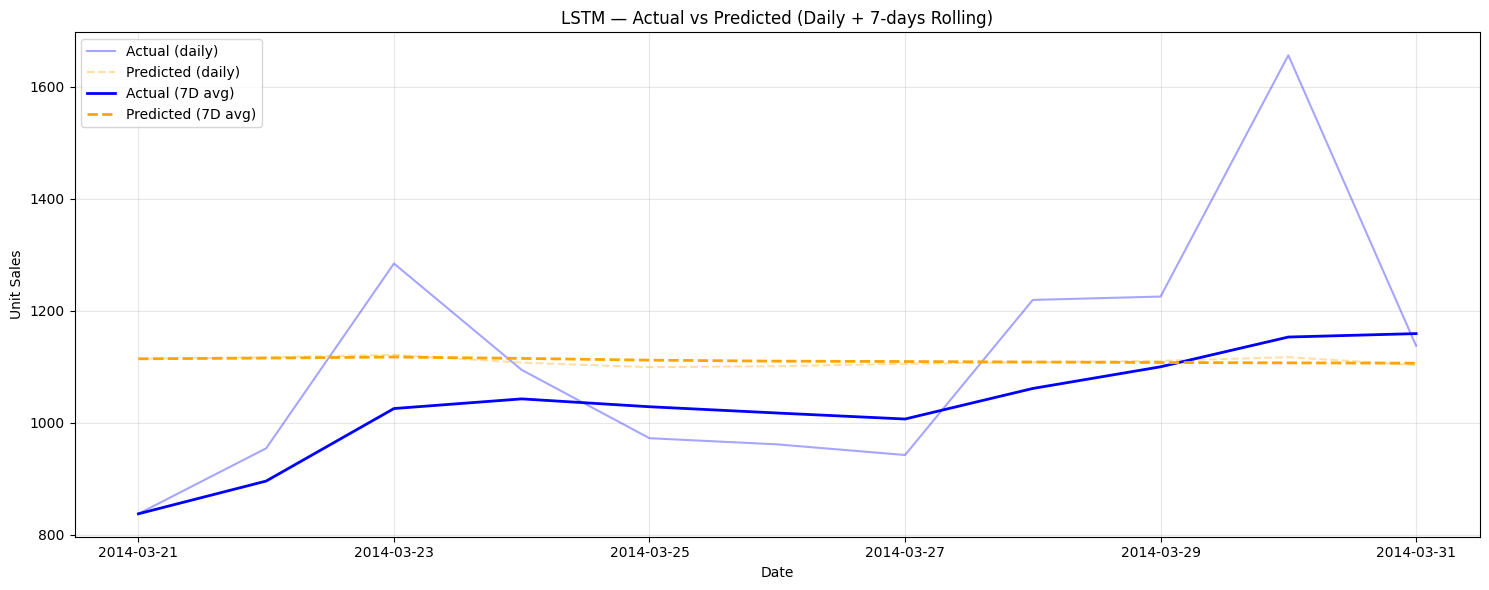

In [ ]:
# 6) Plot
plt.figure(figsize=(15,6))
plt.plot(daily_lstm['date'], daily_lstm['y_true'], label='Actual (daily)', color='blue', alpha=0.35)
plt.plot(daily_lstm['date'], daily_lstm['y_pred'], label='Predicted (daily)', color='orange', alpha=0.35, linestyle='--')
plt.plot(daily_lstm['date'], daily_lstm['y_true_7d'], label='Actual (7D avg)', color='blue', linewidth=2)
plt.plot(daily_lstm['date'], daily_lstm['y_pred_7d'], label='Predicted (7D avg)', color='orange', linewidth=2, linestyle='--')
plt.title('LSTM — Actual vs Predicted (Daily + 7-days Rolling)')
plt.xlabel('Date'); plt.ylabel('Unit Sales'); plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


### **Tuned LSTM (Hyperparameter Tuning)**

In [ ]:
# TEST ONLY 1 CONFIG (instead of 2-3)
config = {'units1': 100, 'units2': 50, 'dropout': 0.3, 'batch_size': 64}

tuned_start = time.time()

print(f"\nTesting tuned configuration...")
print(f"  LSTM units: [{config['units1']}, {config['units2']}]")
print(f"  Dropout: {config['dropout']}, Batch size: {config['batch_size']}")


Testing tuned configuration...
  LSTM units: [100, 50]
  Dropout: 0.3, Batch size: 64


In [ ]:
# Build tuned model
tuned_model = Sequential([
    LSTM(config['units1'], activation='relu', return_sequences=True,
         input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(config['dropout']),
    LSTM(config['units2'], activation='relu'),
    Dropout(config['dropout']),
    Dense(1)
])

tuned_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train (with progress bar)
print("\nTraining tuned model...")
history_tuned = tuned_model.fit(
    X_train_scaled, y_train_scaled,
    epochs=5,  # REDUCED to 5
    batch_size=config['batch_size'],
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1  # Show progress
)

tuned_time = time.time() - tuned_start

print(f"\nTuning completed in {tuned_time:.2f}s ({tuned_time/60:.2f} minutes)")



Training tuned model...
Epoch 1/5
5837/5837 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - loss: 0.6733 - mae: 0.1139 - val_loss: 1.9123 - val_mae: 0.1621
Epoch 2/5
5837/5837 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - loss: 0.6730 - mae: 0.1147 - val_loss: 1.9128 - val_mae: 0.1563
Epoch 3/5
5837/5837 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - loss: 0.6730 - mae: 0.1146 - val_loss: 1.9124 - val_mae: 0.1592
Epoch 4/5
5837/5837 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - loss: 0.6730 - mae: 0.1145 - val_loss: 1.9122 - val_mae: 0.1674
Epoch 5/5
5837/5837 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - loss: 0.6730 - mae: 0.1151 - val_loss: 1.9116 - val_mae: 0.1684

Tuning completed in 411.00s (6.85 minutes)


In [ ]:
# Predict & evaluate
y_pred_tuned_scaled = tuned_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_tuned = scaler_y.inverse_transform(y_pred_tuned_scaled.reshape(-1, 1)).flatten()

tuned_rmse = np.sqrt(mean_squared_error(y_test_lstm, y_pred_tuned))
tuned_mae = mean_absolute_error(y_test_lstm, y_pred_tuned)
tuned_r2 = r2_score(y_test_lstm, y_pred_tuned)
# Calculate MAPE, handling zero values in y_test_lstm
# Add a small epsilon to avoid division by zero
epsilon = 1e-8
tuned_mape = mean_absolute_percentage_error(y_test_lstm, y_pred_tuned)


print(f"\nTuned LSTM Results:")
print(f"   RMSE: {tuned_rmse:.4f}")
print(f"   MAE:  {tuned_mae:.4f}")
print(f"   MAPE: {tuned_mape:.4f}") # Added MAPE
print(f"   R²:   {tuned_r2:.4f}")
print(f"   Time: {tuned_time:.2f}s")

# Save best config
best_config = config
best_model = tuned_model


Tuned LSTM Results:
   RMSE: 2.0901
   MAE:  0.2836
   MAPE: 590112531616957.2500
   R²:   -0.0000
   Time: 411.00s
